In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')

# para pintar
import pylab as plt
import seaborn as sns

# para que salga el grafico
 #matplotlib inline

ModuleNotFoundError: No module named 'pylab'

#LIMPIEZA#


In [2]:
df_ori = pd.read_csv('../proyecto1-sharks-/attacks.csv',  encoding='cp1252')

df = df_ori.copy()

df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [3]:
df.shape

(25723, 24)

In [4]:
df.info('deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [5]:
num_df = df.select_dtypes(exclude='object')

num_df.columns

Index(['Year', 'original order'], dtype='object')

In [6]:
#eliminamos duplicados

df= df.drop_duplicates()

In [7]:
df.shape


(6312, 24)

REVISAMOS COLUMNAS CON VALORES 0 - VACIOS PARA LUEGO CVER QUE PODEMOS HACER.

In [8]:
nan_cols = df.isna().sum()
nan_cols[nan_cols>0]


Case Number                  2
Date                        10
Year                        12
Type                        14
Country                     60
Area                       465
Location                   550
Activity                   554
Name                       220
Sex                        575
Age                       2841
Injury                      38
Fatal (Y/N)                549
Time                      3364
Species                   2848
Investigator or Source      27
pdf                         10
href formula                11
href                        10
Case Number.1               10
Case Number.2               10
original order               3
Unnamed: 22               6311
Unnamed: 23               6310
dtype: int64

In [9]:
#VAMOS A ELIMINAR EN LA COLUMNA DATA LA PALABRA REPORTED PARA HOMOGENIZAR LA COLUMNA

df.Date.unique()

array(['25-Jun-2018', '18-Jun-2018', '09-Jun-2018', ..., '1883-1889',
       '1845-1853', nan], dtype=object)

In [10]:
#AQUI HAGO EL REPLACE DE REPORTED -

df['Date'] = df['Date'].str.replace('Reported','')

In [16]:
df.Date[df.Date == 'Reported']

4211    1957
4212    1957
4213    1957
4214    1957
4215    1957
4216    1957
4217    1957
4218    1957
4219    1957
4220    1957
4221    1957
Name: Date, dtype: object

In [11]:
df.Date.value_counts()

1957                  11
1942                   9
1956                   8
1958                   7
1941                   7
                      ..
25-Nov-1994            1
01-Dec-1994            1
      10-Dec-1994      1
11-Dec-1994            1
1845-1853              1
Name: Date, Length: 5432, dtype: int64

In [18]:
#VAMOS A VER SI ENCONTRAMOS LA REPORTED DENTRO DE LA COLUMNA DATE. PARA ENTENDER SI LA HEMOS REEMPLAZADO.

key_word = 'Reported'

find = df.Date[df.Date.str.contains(key_word)]

find

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [ ]:
#REVISO SI SIGUE EXISTIENDO Y PARECE QUE YA HA HECHO EL REPLACE. Iguamente esta columna tiene muchas filas que podrian ser homogenizadas, sin embargo
#de primeras pienso que no es necesario complicarse con un dato en parte irrelevante, ya que el dia es demasiado puntual y no hay posible forma de
#correcionarlo con otros datos. pero si interesa el mes a ser posible

filtered = df[(df['Date']=='Reported')]
filtered.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23


ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [ ]:

df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

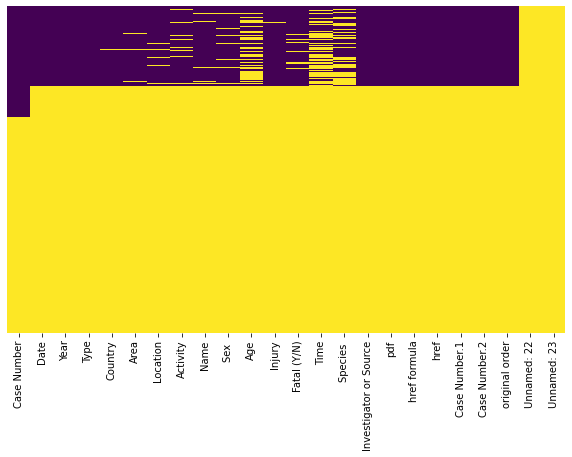

In [ ]:
plt.figure(figsize=(10,6))

sns.heatmap(df.isna(),
           yticklabels=False,
           cmap='viridis',
           cbar = False)

plt.show()

In [ ]:
#COLUMNA -- > TYPE#

In [19]:
df.Type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [20]:
df.Type.value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [ ]:
#df.Type.fillna('unknown', inplace=True)

In [22]:
#aqui encontraremos los valores en la columna type -invalid- para eliminar todas las filas que lo contengan. Parece no funcionar hasta que ocupe los nulos
#con unknown o otro dato, existen 574 valores "invalid" y 2 "Questionable" y unos 14 vacios que vamos a llamar "unknonw " y dropearlos.

df.Type.fillna('unknown', inplace=True)


In [24]:
key_word = 'Invalid'

find = df[df.Type.str.contains(key_word, regex=True)]

find

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
13,2018.05.13.a,13-May-2018,2018.0,Invalid,ENGLAND,Cornwall,Off Land's End,Fishing,Max Berryman,M,21,Injured by teeth of a dead porbeagle shark he ...,N,08h15,Invalid incident,"K. McMurray, TrackingSharks.com",2018.05.13.a-Berryman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.13.a,2018.05.13.a,6290.0,NaN,NaN
31,2018.04.10.R,10-Apr-2018,2018.0,Invalid,BRAZIL,Alagoas,"Praia de Sauaçuhy, Maceió",Fishing,Josias Paz,M,56,Injury to ankle from marine animal trapped in ...,N,NaN,Shark involvement not confirmed,"K. McMurray, TrackingSharks.com",2018.04.10.R-Paz.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.10.R,2018.04.10.R,6272.0,NaN,NaN
43,2018.02.14,14-Feb-2018,2018.0,Invalid,AUSTRALIA,Queensland,Mooloolaba Beach,Swimming,Sharna Babd,F,NaN,"Collision / No injury, no attack",N,18h00,Possibly a wobbegong,"Sunshine Coast Daily, 2/15/2018",2018.02.14-Babd.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.02.14,2018.02.14,6260.0,NaN,NaN
44,2018.02.11,11-Feb-2018,2018.0,Invalid,BRAZIL,"Boi Island, Victoria",Espirito Santo,Cleaning fish,Rosalida Souza,F,46,Lacerations to 4 toes of right foot,N,NaN,"Injury believed caused by an eel, not a shark",TrackingSharks.com,2018.02.11-Rosilda.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.02.11,2018.02.11,6259.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6147,1767.00.00,1767,1767.0,Invalid,FRANCE,Côte d'Azur,St. Tropez,Bathing,Samuel Matthews,M,NaN,Lacerations to arm & leg,NaN,NaN,Description of shark does not ring true,NaN,1767.00.00-Matthews.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1767.00.00,1767.00.00,156.0,NaN,NaN
6157,1733.00.00,1733,1733.0,Invalid,ICELAND,Bardestrand,Talkknefiord,NaN,NaN,NaN,NaN,"Partial hominid remains recovered from shark, ...",NaN,NaN,Shark involvement prior to death unconfirmed,E. Olafsen,1733.00.00-Iceland.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1733.00.00,1733.00.00,146.0,NaN,NaN
6164,1642.00.00.b,Late 1600s 1728,1642.0,Invalid,GUINEA,NaN,NaN,Went overboard,crew member of the Nieuwstadt,M,NaN,FATAL,NaN,NaN,Questionable,"History of the Pyrates, by D. Defoe, Vol. 2, p.28",1642.00.00.b-Nieuwstadt.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1642.00.00.b,1642.00.00.b,139.0,NaN,NaN
6227,ND.0086,"No date, Before 1975",0.0,Invalid,PAPUA NEW GUINEA,Milne Bay Province,"D'Entrecasteaux islands, 20 miles off the coast",Scuba diving,Dan Hogan,M,NaN,Said to be fatal and involve a 4.6 m to 6 m [1...,Y,NaN,Questionable,"F. Dennis, pp.15-16",ND-0086-DanHogan.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0086,ND.0086,76.0,NaN,NaN


In [25]:
#vamos a probar una forma de borrar invalid, y si funciona le añado el resto

df = df[df["Type"].str.contains("Invalid") == False]


In [28]:
#funciono!!!

key_word = 'Invalid'

find = df[df.Type.str.contains(key_word, regex=True)]

find

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
